In [3]:
data=pd.read_csv("Logistic_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,Mrs,1


In [5]:
data['Sex']=data['Sex'].map({'female':1 , 'male':0})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,S,Mrs,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=data[[ "Sex", "Age"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

logreg = LogisticRegression()   
l=logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


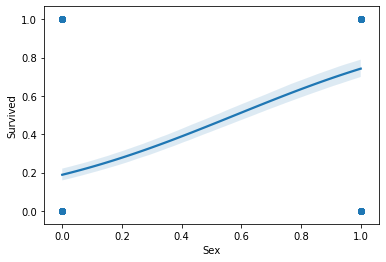

In [44]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=data,logistic=True)

In [49]:
import matplotlib.pyplot as plt

confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'],)
confusion_matrix

Predicted,0,1
Actual,,
0,156,33
1,38,85


Text(0.5, 1, 'koussay')

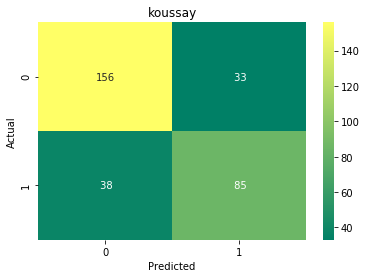

In [57]:
sns.heatmap(confusion_matrix, annot=True ,fmt="3.0f", cmap="summer")
plt.title("koussay")

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       189
           1       0.72      0.69      0.71       123

    accuracy                           0.77       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.77      0.77      0.77       312



In [61]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)
roc_auc_score(y_test, y_pred)

0.7582268679829655

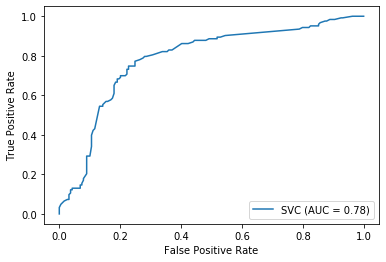

In [66]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
clf = svm.SVC(random_state=0)
clf.fit(x_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.show()                                   